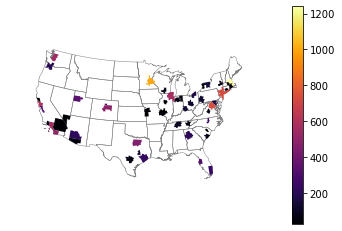

In [1]:
# Creating example bls maps
from bls_geo import *

# can check out https://www.bls.gov/oes/current/oes_stru.htm
bio = '172031'
bio_stats = oes_geo(bio)
areas = get_areas() # this takes a few minutes
state = state_albers()
geo_bio = merge_occgeo(bio_stats,areas)

ax = geo_bio.plot(column='Employment',cmap='inferno',legend=True,zorder=2)
state.boundary.plot(ax=ax,color='grey',linewidth=0.5,zorder=1)
ax.set_ylim(0.1*1e6,3.3*1e6)
ax.set_xlim(-0.3*1e7,0.3*1e7)   # lower 48 focus (for Albers proj)
ax.set_axis_off()
plt.show()

In [2]:
# Can export to excel (csv parsing is tough, maybe use tsv instead)
bio_stats.to_excel('biojobs.xlsx')

att = ['areaName','Employment','Location Quotient','Employment per 1,000 jobs','Annual mean wage']
form = ['',',.0f','.2f','.2f',',.0f']

map_bio = fol_map(geo_bio,'Employment',['lat', 'lon'],att,form)
#map_bio.save('biomap.html')
map_bio

In [3]:
# Data science jobs
ds = '152098'
ds_stats = oes_geo(ds)
geo_ds = merge_occgeo(ds_stats,areas)
geo_ds.sort_values(by='Employment',inplace=True,ascending=False)
lim_fields = ['areaName','Employment','Annual mean wage','Annual 75th percentile wage']
geo_ds[lim_fields].head(10)

,areaName,Employment,Annual mean wage,Annual 75th percentile wage
69,"New York-Newark-Jersey City, NY-NJ-PA",4730,129250.0,158950.0
92,"San Francisco-Oakland-Hayward, CA",3170,148680.0,175410.0
105,"Washington-Arlington-Alexandria, DC-VA-MD-WV",2410,108060.0,132720.0
24,"Chicago-Naperville-Elgin, IL-IN-WI",2410,101180.0,126170.0
95,"Seattle-Tacoma-Bellevue, WA",2330,121090.0,149700.0
93,"San Jose-Sunnyvale-Santa Clara, CA",2190,146400.0,178300.0
30,"Dallas-Fort Worth-Arlington, TX",2160,103860.0,124100.0
8,"Atlanta-Sandy Springs-Roswell, GA",1810,92240.0,118250.0
60,"Los Angeles-Long Beach-Anaheim, CA",1640,117550.0,145070.0
78,"Phoenix-Mesa-Scottsdale, AZ",1350,109000.0,130500.0


In [4]:

map_ds = fol_map(geo_ds,'Annual 75th percentile wage',['lat', 'lon'],att,form)
map_ds